SubPlot and Shared Axes

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("water.csv")
df.head()

,datetime,height,temp
0,2018-07-01 18:30:00,-123,16.7
1,2018-07-01 18:40:00,-125,16.7
2,2018-07-01 18:50:00,-124,16.7
3,2018-07-01 19:00:00,-120,16.7
4,2018-07-01 19:10:00,-113,16.7


In [4]:
df.dtypes

datetime     object
height        int64
temp        float64
dtype: object

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
#df['minute'] = df['datetime'].dt.minute

df.head()

,datetime,height,temp,Year,Month,Day
0,2018-07-01 18:30:00,-123,16.7,2018,7,1
1,2018-07-01 18:40:00,-125,16.7,2018,7,1
2,2018-07-01 18:50:00,-124,16.7,2018,7,1
3,2018-07-01 19:00:00,-120,16.7,2018,7,1
4,2018-07-01 19:10:00,-113,16.7,2018,7,1


In [7]:
days = df[df['Month'].isin([1,7])&(df['Day']==1)].drop("Day",axis=1)
days.head()

,datetime,height,temp,Year,Month
0,2018-07-01 18:30:00,-123,16.7,2018,7
1,2018-07-01 18:40:00,-125,16.7,2018,7
2,2018-07-01 18:50:00,-124,16.7,2018,7
3,2018-07-01 19:00:00,-120,16.7,2018,7
4,2018-07-01 19:10:00,-113,16.7,2018,7


In [ ]:
#days['datetime'].str()

In [8]:
days = days.pivot(columns='Month',index='datetime')
days.head()

,height,temp,Year
Month,7,7,7
datetime,,,
2018-07-01 18:30:00,-123,16.7,2018
2018-07-01 18:40:00,-125,16.7,2018
2018-07-01 18:50:00,-124,16.7,2018
2018-07-01 19:00:00,-120,16.7,2018
2018-07-01 19:10:00,-113,16.7,2018


In [9]:
days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 18:30:00 to 2018-07-01 23:30:00
Data columns (total 3 columns):
(height, 7)    31 non-null int64
(temp, 7)      31 non-null float64
(Year, 7)      31 non-null int64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes


In [10]:
days.head()

,height,temp,Year
Month,7,7,7
datetime,,,
2018-07-01 18:30:00,-123,16.7,2018
2018-07-01 18:40:00,-125,16.7,2018
2018-07-01 18:50:00,-124,16.7,2018
2018-07-01 19:00:00,-120,16.7,2018
2018-07-01 19:10:00,-113,16.7,2018


<IPython.core.display.Javascript object>


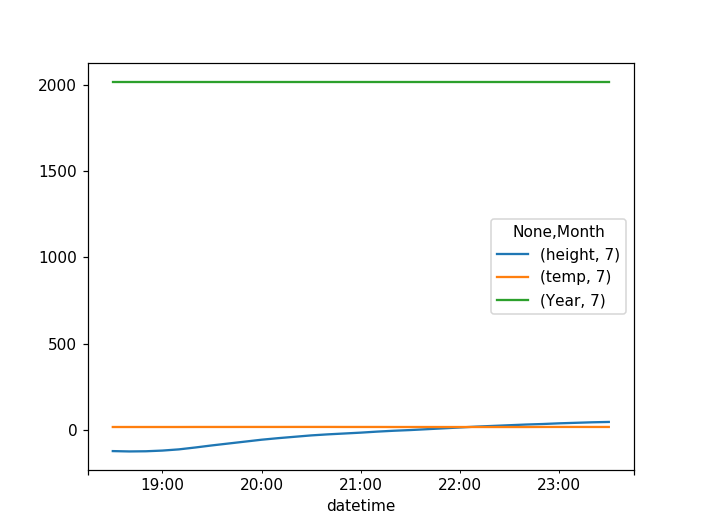

In [11]:
ax = days.plot()

<IPython.core.display.Javascript object>


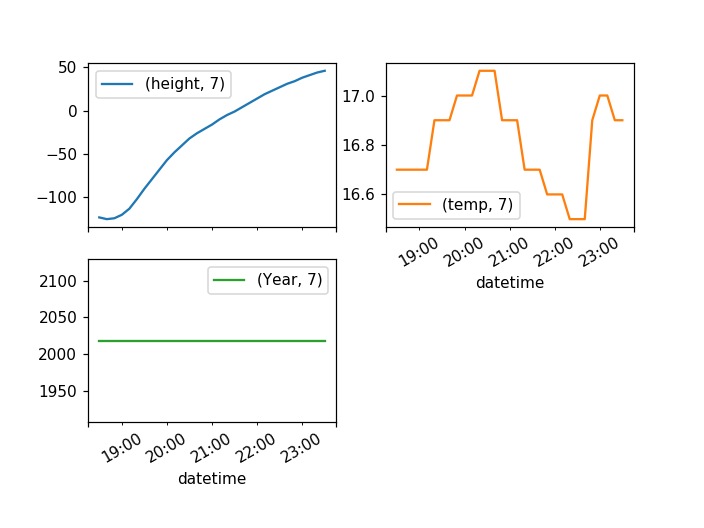

In [12]:
ax = days.plot(subplots=True,layout=(2,2))

<IPython.core.display.Javascript object>


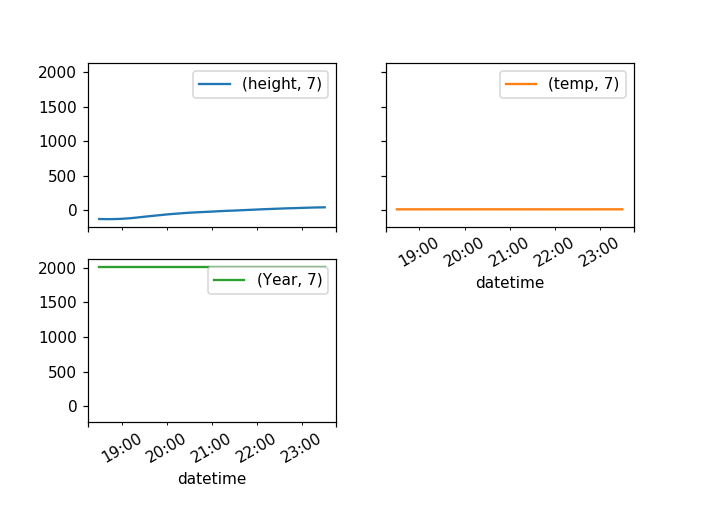

In [13]:
ax = days.plot(subplots=True,layout=(2,2),sharey=True)

In [18]:
fig,ax = plt.subplots(2,2,sharey='row',sharex='col')
days['temp'].plot(subplots=True,ax=ax[0],legend=False)
days['pressure'].plot(subplots=True,ax=ax[1],legend=False)

<IPython.core.display.Javascript object>

ValueError: The number of passed axes must be 1, the same as the output plot

In [17]:
days()

,height,temp,Year
Month,7,7,7
datetime,,,
2018-07-01 18:30:00,-123,16.7,2018
2018-07-01 18:40:00,-125,16.7,2018
2018-07-01 18:50:00,-124,16.7,2018
2018-07-01 19:00:00,-120,16.7,2018
2018-07-01 19:10:00,-113,16.7,2018
2018-07-01 19:20:00,-102,16.9,2018
2018-07-01 19:30:00,-90,16.9,2018
2018-07-01 19:40:00,-79,16.9,2018


In [20]:
ax[0][0].set_ylabel('Temp')
ax[0][0].set_title('January')
ax[0][1].set_title('July')
ax[1][0].set_ylabel('Pressure')
ax[1][0].set_ylabel('Time')
ax[1][1].set_ylabel('Time')

fig.tight_layout()
